# Welcome to this months Central London Data Science Meetup! 

If you've ever read a data science related blog before, you'll probably have read either:
* 'AI is the new electricity' (I'm looking at you Andrew Ng)
* '90% of a data scientist time is spent sourcing and then cleaning the data'

In tonights notebook we will be delving into predicting the genre of songs using spotify data. From this you'll see that a data scientist really does spend a lot of time collecting and wrangling data.



So without further ado lets get started!

In [434]:
import os
import re
import json
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Sourcing data online

Sourcing data for a project can be tricky, one option is to scower the internet looking for datasets to download. Another option is to use an Application Programming Interface (API).


### APIs
An API allows different applications to share data between each another. By calling an API we gain access to data held on a server.

### So why are these good for a data scientist?

Say you wanted to keep up-to-date the National Leage promotion race (abosulte nail biter). You could search for the hashtag #LeytonOrient and copy and paste each of the tweets into a document. This will take forever.

The next best thing would be to email twitter and ask for a dataset of the twitter stream, but again this would waste even more peoples peoples time. 

Instead, companies create these access points known as APIs that let you query available data. This reduces up the time needed to collect the data you need for your project. Great!

### What to expect from an API
Information returned from an API can come in a couple of formats, but the one that we'll be using today is JavaScript Object Notation- JSON. 

JSON is ubiquitous throughout the web. It's human readable, lightweight and can be interpreted by a tonne of languages, including python. 


# Sourcing our data
So now that we know what an API is and what to expect from it, the next hurdle is understanding how to get it and what it'll contain. 

With this in mind let's jump over to the spotify API documentation- https://developer.spotify.com/documentation/web-api/reference/

In order to source and naviagate the data needed for a project you will need to understand what each key and value represent, so get used to jumping between your code and API documentation.

Have a look for yourself across all the documentation- (It might give you a bit of inspiration for your own project).

For our project we will be living on these two pages: 

* https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/

* https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


These pages are incredibly useful- we get a description of what the data represent, but a map of how to access it.

In the interest of time, (and also ensuring we don't bring CodeNodes internet crashing down). All the data for tonights excercise is stored locally in the environment. 

However, at the end of the exercise we'll have a mini tutorial on how to call an API by yourself.

Let's jump into a single songs audio analysis.


In [435]:
single_song_path = '../input/singlesong/single_song.json'
with open(single_song_path, 'rb') as f:
    song_json = json.load(f)
print(song_json)

{'meta': {'analyzer_version': '4.0.0', 'platform': 'Linux', 'detailed_status': 'OK', 'status_code': 0, 'timestamp': 1444833490, 'analysis_time': 21.35246, 'input_process': 'libvorbisfile L+R 44100->22050'}, 'track': {'num_samples': 11539500, 'duration': 523.33333, 'sample_md5': '', 'offset_seconds': 0, 'window_seconds': 0, 'analysis_sample_rate': 22050, 'analysis_channels': 1, 'end_of_fade_in': 0.0, 'start_of_fade_out': 523.33331, 'loudness': -6.82, 'tempo': 125.152, 'tempo_confidence': 0.078, 'time_signature': 4, 'time_signature_confidence': 0.877, 'key': 11, 'key_confidence': 0.738, 'mode': 1, 'mode_confidence': 0.664, 'codestring': 'eJxVm1eC4zgSRK-iI8Cb-19s3wuwZmZ_uouQBIJpIiMN9xzlrF7Wr_xqLaevc9tv1PVr9bZVVuv8NcZvtjXabfXXWym_ede6tc7-G5MPx6xjl37Wb7VRvOztzHV_7Dx-e5yy5-jnt085v9ZW3Vy132mT-_DPGrv23y3nfJetzt_te_3G8r791l8tc5XfmfXcOSvXdZ7xu23v3Su_rpyreH3GbrVx3Wf78Qh3tjsO14N_OUc95R6etrOh18tb8HmfJfutfeq8XJ_G2c_kifZh_zHbyf3KKY3fj8v53v2qv5-tc9fFXfpl5zqH_5bZ776z-IXNsXy0woPz1Xn7QpK7IK7NDXhuJMu9xhmd

Kinda gross, right? Let's make this a bit easier on the eyes.

Try using the `json.dumps()` function.

In [436]:
print(json.dumps(song_json, indent=4, sort_keys=True))

{
    "bars": [
        {
            "confidence": 0.603,
            "duration": 2.80314,
            "start": 0.69387
        },
        {
            "confidence": 0.702,
            "duration": 2.87719,
            "start": 3.49702
        },
        {
            "confidence": 0.236,
            "duration": 2.99003,
            "start": 6.37421
        },
        {
            "confidence": 0.96,
            "duration": 2.99611,
            "start": 9.36424
        },
        {
            "confidence": 0.522,
            "duration": 2.92362,
            "start": 12.36034
        },
        {
            "confidence": 0.756,
            "duration": 2.83032,
            "start": 15.28396
        },
        {
            "confidence": 0.605,
            "duration": 2.85003,
            "start": 18.11428
        },
        {
            "confidence": 0.607,
            "duration": 2.86682,
            "start": 20.96431
        },
        {
            "confidence": 0.158,
          

Still a bit intimadating though...

When we load in a json object- python interprets it as a dictionary. So lets use some python 101 to navigate the struture.

A dictionary consists of a collection of key-value pairs. Each key-value pair maps the key to its associated value.

You can build a dictionary by wrapping a `key` joined by a colon `:` to an asscoicated `value` using curly braces `{}`.

Let's build a simple dictionary

In [437]:
dictionary = {'dog': 'woof',
              'cat': 'meow',
              'lazer': 'zapppp',
              'list_of_things': ['a', 3, dict()],
              'numbers': 10012}
dictionary

{'dog': 'woof',
 'cat': 'meow',
 'lazer': 'zapppp',
 'list_of_things': ['a', 3, {}],
 'numbers': 10012}

Here we have a dictionary built of key-value pairs. You can access each value stored in the dictionary using the keys.

In [438]:
dictionary.keys()

dict_keys(['dog', 'cat', 'lazer', 'list_of_things', 'numbers'])

Here's how we would access the value associated with the key `dog`

In [439]:
dictionary['dog']

'woof'

Now the super cool thing about dictionary object is that you can store a tonne of inforation in a variety of formats. Lets check out `list_of_things`.

In [440]:
dictionary['list_of_things']

['a', 3, {}]

It returns a `list`, we can either associate this value with a variable and work with it elsewhere like so....

In [441]:
list_of_things = dictionary['list_of_things']
list_of_things[0]

'a'

Or access the list object directly...

In [442]:
dictionary['list_of_things'][0]

'a'

Cool! So now we have the basics of how to naviagate our way across a dictionary, let's put it to use.

Here are the keys to our audio analysis

In [443]:
song_json.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

Lets look at the meta data values...

In [444]:
song_json['meta']

{'analyzer_version': '4.0.0',
 'platform': 'Linux',
 'detailed_status': 'OK',
 'status_code': 0,
 'timestamp': 1444833490,
 'analysis_time': 21.35246,
 'input_process': 'libvorbisfile L+R 44100->22050'}

OK, this stuff is a bit boring, let's get into the data that we'll be using for our model.
Head on over to the [doumentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/) and check out what `segments` represents.

**"Audio segments attempts to subdivide a song into many segments, with each segment containing a roughly consitent sound throughout its duration."**

In [445]:
song_json['segments']

[{'start': 0.0,
  'duration': 0.24939,
  'confidence': 0.0,
  'loudness_start': -23.687,
  'loudness_max_time': 0.02213,
  'loudness_max': -18.577,
  'pitches': [0.523,
   0.972,
   0.744,
   0.56,
   0.312,
   0.377,
   0.157,
   0.197,
   0.376,
   0.238,
   1.0,
   0.668],
  'timbre': [40.394,
   55.786,
   -43.655,
   -57.349,
   -63.128,
   -24.972,
   -63.077,
   -16.365,
   9.929,
   17.088,
   1.962,
   -37.01]},
 {'start': 0.24939,
  'duration': 0.18127,
  'confidence': 0.046,
  'loudness_start': -19.326,
  'loudness_max_time': 0.14004,
  'loudness_max': -17.664,
  'pitches': [0.317,
   0.817,
   0.417,
   0.284,
   0.616,
   0.748,
   1.0,
   0.993,
   0.4,
   0.333,
   0.472,
   0.294],
  'timbre': [41.596,
   42.01,
   -30.859,
   -59.384,
   -51.243,
   -31.626,
   -61.431,
   -16.253,
   8.37,
   12.738,
   -9.009,
   -31.322]},
 {'start': 0.43066,
  'duration': 1.71129,
  'confidence': 0.152,
  'loudness_start': -18.446,
  'loudness_max_time': 0.5054,
  'loudness_max': -

Segments returns a list of dictionaries, each of these dictionaries contains string data and lists.

Great, our dictionary contains a list of other dictionaries, that isn't confusing at all...

What we want is the timbre values.

**Timbre is the quality of a musical note or sound that distinguishes different types of musical instruments, or voices. Timbre vectors are best used in comparison with each other.**

In [446]:
# Access the first element (dictionary) in the list
first_segment = song_json['segments'][0]
first_segment

{'start': 0.0,
 'duration': 0.24939,
 'confidence': 0.0,
 'loudness_start': -23.687,
 'loudness_max_time': 0.02213,
 'loudness_max': -18.577,
 'pitches': [0.523,
  0.972,
  0.744,
  0.56,
  0.312,
  0.377,
  0.157,
  0.197,
  0.376,
  0.238,
  1.0,
  0.668],
 'timbre': [40.394,
  55.786,
  -43.655,
  -57.349,
  -63.128,
  -24.972,
  -63.077,
  -16.365,
  9.929,
  17.088,
  1.962,
  -37.01]}

In [447]:
# Then access the timbre values
first_segment['timbre']

[40.394,
 55.786,
 -43.655,
 -57.349,
 -63.128,
 -24.972,
 -63.077,
 -16.365,
 9.929,
 17.088,
 1.962,
 -37.01]

We can combine the two lines and pass it through a for loop to get all the timbre values across each segment for this song...


In [448]:
song_timbres = []
for segment in song_json['segments']:
    song_timbres.append(segment['timbre'])
song_timbres

[[40.394,
  55.786,
  -43.655,
  -57.349,
  -63.128,
  -24.972,
  -63.077,
  -16.365,
  9.929,
  17.088,
  1.962,
  -37.01],
 [41.596,
  42.01,
  -30.859,
  -59.384,
  -51.243,
  -31.626,
  -61.431,
  -16.253,
  8.37,
  12.738,
  -9.009,
  -31.322],
 [43.249,
  30.072,
  -38.75,
  -54.075,
  -51.512,
  -33.86,
  -65.343,
  -5.47,
  4.905,
  9.392,
  -0.82,
  -23.344],
 [43.901,
  28.068,
  -44.739,
  -53.635,
  -52.176,
  -20.712,
  -66.51,
  -4.221,
  -2.128,
  18.216,
  -11.712,
  -14.804],
 [44.676,
  2.875,
  -39.855,
  -41.291,
  -42.437,
  -17.874,
  -52.823,
  -4.776,
  6.148,
  -10.549,
  -9.936,
  -11.593],
 [43.046,
  -14.222,
  -53.309,
  -49.318,
  -56.625,
  -28.652,
  -44.47,
  -11.421,
  1.363,
  -0.243,
  -8.244,
  -11.652],
 [43.778,
  -16.302,
  -41.818,
  -49.392,
  -47.743,
  -33.239,
  -44.076,
  -1.195,
  6.422,
  0.496,
  3.492,
  -13.187],
 [45.34,
  14.957,
  -34.949,
  -49.281,
  -46.681,
  -29.881,
  -52.334,
  4.562,
  9.099,
  -3.701,
  4.174,
  -14.191],
 

Neat, we've just navigated and stored the relevant data for our model.

However, this is only one song, we'll need to get a few more samples to play with.

We've collected about 50 songs from some well known genres:
* jazz
* blues
* funk,
* metal
* classical
* hiphop
* pop
* electronic

And streamlined the data to include the information we'll need for the rest of the exercise.

Let's use our knowledge of dictionary naviagation to wrangle the data into a Dataframe so we can model it.

Within the `musicdata` folder we have a few JSON files, each one contains songs and their segment data from a single genre.

In [449]:
training_data_path = '../input/musicdata/'
os.listdir(training_data_path)

['pop.json',
 'jazz.json',
 'classical.json',
 'absoluteclassicfile.DS_Store',
 'hiphop.json',
 'electronic.json',
 'funk.json',
 'metal.json',
 'blues.json']

We want to combine all these data sources into one big dataframe.

Each one has the same structure, let's look at an example fo how to get the data.

In [450]:
with open(os.path.join(training_data_path,'hiphop.json'), 'rb') as f:
    hiphop = json.load(f)

In [451]:
# Each key is a unique identifer for a song known as a URI
hiphop.keys()

dict_keys(['spotify:track:24vNw0Z0srb4zYXwrakw8E', 'spotify:track:5fpizYGbi5IQoEraj6FP0R', 'spotify:track:3ABG1UQTk0eLYUAeWkmfMi', 'spotify:track:7bp5DfkdK1OAvNJ1U4HfDA', 'spotify:track:2PRsh2LNPxoxC9OnErnelg', 'spotify:track:1Sgj10byiGzPpI2IrXSFEn', 'spotify:track:5h9mwffuipb2TSeTFp8Pu0', 'spotify:track:3lGBvPUgO7MJltUnBlOpe9', 'spotify:track:2FWmKZ3kNbVsKGhuNHsltW', 'spotify:track:0trHOzAhNpGCsGBEu7dOJo', 'spotify:track:3glqlA5qY3bbo8UaUDGPnw', 'spotify:track:0PV1TFUMTBrDETzW6KQulB', 'spotify:track:6enXeBnLnyjfweN6VWcIoh', 'spotify:track:4EfBENPBy1GvUWLO9YAp3F', 'spotify:track:3b48PjcQRqOLR2tGW83aVD', 'spotify:track:119c93MHjrDLJTApCVGpvx', 'spotify:track:4C7Ss9bTPOWJMh3rarF1mN', 'spotify:track:3iajlDW8TWwAE3gWvPRTnI', 'spotify:track:33ZXjLCpiINn8eQIDYEPTD', 'spotify:track:4lqU4WByDFKDGrHknQV6ZC', 'spotify:track:7F9FgsJXWvFENrhLYtYymg', 'spotify:track:6loNZHKeeNUjrUkjXdCwiZ', 'spotify:track:2vpvIEM9321ME9Z63nd3Rm', 'spotify:track:6WceXj9vvlxVyRCkDXt4nI', 'spotify:track:2vfvGlqCB7oert

In [452]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib'].keys()

dict_keys(['artist', 'song', 'meta'])

In [453]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib']['artist']

'Artifacts'

In [454]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib']['song']

"C'Mon wit da Git Down"

In [455]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib']['meta'].keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

In [456]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib']['meta']['segments'][0]

{'start': 0.0,
 'duration': 0.06372,
 'confidence': 0.0,
 'loudness_start': -60.0,
 'loudness_max_time': 0.03483,
 'loudness_max': -58.649,
 'pitches': [0.978,
  1.0,
  0.277,
  0.307,
  0.354,
  0.294,
  0.509,
  0.479,
  0.647,
  0.654,
  0.784,
  0.197],
 'timbre': [1.059,
  147.944,
  -24.235,
  -44.27,
  38.438,
  -44.291,
  16.722,
  2.691,
  -32.931,
  8.568,
  -7.709,
  3.943]}

In [457]:
hiphop['spotify:track:3MnwLa9KRUiv2gNFtWPvib']['meta']['segments'][0]

{'start': 0.0,
 'duration': 0.06372,
 'confidence': 0.0,
 'loudness_start': -60.0,
 'loudness_max_time': 0.03483,
 'loudness_max': -58.649,
 'pitches': [0.978,
  1.0,
  0.277,
  0.307,
  0.354,
  0.294,
  0.509,
  0.479,
  0.647,
  0.654,
  0.784,
  0.197],
 'timbre': [1.059,
  147.944,
  -24.235,
  -44.27,
  38.438,
  -44.291,
  16.722,
  2.691,
  -32.931,
  8.568,
  -7.709,
  3.943]}

To give you an idea on the end goal of this wrangling- Check out how the dataframe will look like later...

![](https://github.com/Blair-Young/PredictingMusicGenresFromSpotifyData/blob/master/images/Screen%20Shot%202019-04-21%20at%2015.43.03.png?raw=true)

Lets create a couple of functions to extract this data.

In [458]:
def get_song_name(json_data, song_uri):
    '''Returns song name from song URI key
     Args:
     * json_data- (JSON) 
     * song_uri- (str) URI
     
     Return
     * (str)- Song name
     '''
    return json_data[song_uri]['song']

def get_artist_name(json_data, song_uri):
    '''Returns Artist name from song URI key
     Args:
     * json_data- (JSON) 
     * song_uri- (str) URI
     
     Return:
     * (str)- Artist name
     '''

    return json_data[song_uri]['artist']

def get_timbre_values(json_data, song_uri):
    '''Returns timbre values from a song
    Args:
    * json_data- (JSON) 
    * song_uri- (str) URI 
    
    Return:
    * (list) Each element is a list of timbre values
    '''
    timbre_data = []
    for segment in json_data[song_uri]['meta']['segments']:
        timbre_data.append(segment['timbre'])
    return timbre_data

def get_segment_start_time(json_data, song_uri):
    '''Returns start times of segments from a song
    Args:
    * json_data- (JSON) 
    * song_uri- (str) URI 
    
    Return:
    * (list) Each element is float representing time in milliseconds
    '''
    start_times = []
    for segment in json_data[song_uri]['meta']['segments']:
        start_times.append(segment['start'])
    return start_times

def get_segment_duration(json_data, song_uri):
    '''Returns duration of segments from a song
    Args:
    * json_data- (JSON) 
    * song_uri- (str) URI 
    
    Return:
    * (list) Each element is float representing the duration of a segment
    '''
    durations = [] 
    for segment in json_data[song_uri]['meta']['segments']:
        durations.append(segment['duration'])
    return durations

We have our extraction functions, lets get extracting!

Everything that we return from these functions should go straight into a pandas DataFrame.

For anyone that hasn't used a pandas DataFrame, it's basically a table similiar to that of an Excel/Sheets spreadsheet.
If you want more information about them, check out https://pandas.pydata.org/

In [459]:
def get_genre_data(genre_data, genre_type):
    '''
    Processes a JSON object of a single genre
    Args:
    * genre data (JSON)
    * single genre (str) Name of genre
    
    Returns:
    * pandas DataFrame containing training data and label for ML
    '''
    genre_dataframes = []
    for song_uri in genre_data.keys():
        # Extract the relevant data
        timbres = get_timbre_values(genre_data, song_uri)
        start_times = get_segment_start_time(genre_data, song_uri)
        durations = get_segment_duration(genre_data, song_uri)
        artist_name = get_artist_name(genre_data, song_uri)
        song_name = get_song_name(genre_data, song_uri)
        # Create a dataframe per song
        # We'll build the timbre parts first then add columns
        song_df = pd.DataFrame(timbres)
        song_df['start'] = start_times
        song_df['durations'] = durations
        song_df['song_name'] = song_name
        song_df['artist'] = artist_name
        # Remember to add the genre so we can use it for supervised learning later!
        song_df['genre'] = genre_type
        # Now we need to store/append all the songs in a genre dataframe
        genre_dataframes.append(song_df)
    # Now concatenate the song dataframes into a single genre specific dataframe
    genre_df = pd.concat(genre_dataframes)
    return genre_df

In [460]:
get_genre_data(hiphop, 'hiphop').head()

,0,1,2,3,4,5,6,7,8,9,10,11,start,durations,song_name,artist,genre
0,8.265,48.942,-20.549,-42.172,25.269,-36.269,40.137,10.755,-20.812,12.278,-18.064,-49.766,0.00000,0.22998,Wu-Tang Clan Aint Nuthing ta F' Wit,Wu-Tang Clan,hiphop
1,33.335,66.317,93.449,-98.817,-27.841,32.231,14.981,8.454,-17.311,-2.721,0.873,-8.607,0.22998,0.17637,Wu-Tang Clan Aint Nuthing ta F' Wit,Wu-Tang Clan,hiphop
2,41.199,30.833,80.411,19.936,16.949,-14.840,-19.389,16.384,-12.131,7.526,14.849,-3.105,0.40635,0.74875,Wu-Tang Clan Aint Nuthing ta F' Wit,Wu-Tang Clan,hiphop
3,37.078,3.452,53.159,134.435,14.627,-50.088,-30.968,-49.204,-40.739,-8.479,-58.958,-1.130,1.15510,0.55107,Wu-Tang Clan Aint Nuthing ta F' Wit,Wu-Tang Clan,hiphop
4,27.272,-150.095,72.632,-16.940,78.331,-37.748,-3.391,5.130,13.160,3.630,0.077,-21.539,1.70617,0.12853,Wu-Tang Clan Aint Nuthing ta F' Wit,Wu-Tang Clan,hiphop


Let's scale it up so we can use it across all genres.

In [461]:
genre_data_path = '../input/musicdata/'
genre_list = os.listdir(genre_data_path)

In [462]:
all_genre_list = []
for genre in genre_list:
    # Get rid of the pesky .DS_Store files with this clause
    if not genre.endswith('.DS_Store'):
        path = os.path.join(genre_data_path, genre)
        with open(path, 'rb') as f:
            genre_json = json.load(f)
        # Extract the genre from the file name    
        genre_label = genre.replace('.json', '')   
        # Apply our function
        genre_data = get_genre_data(genre_json, genre_label)
        all_genre_list.append(genre_data)

df = pd.concat(all_genre_list)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,start,durations,song_name,artist,genre
0,0.000,171.130,9.469,-28.480,57.491,-50.067,14.833,5.359,-27.228,0.973,-10.640,-7.228,0.00000,0.19764,Boy With Luv (feat. Halsey),BTS,pop
1,44.809,-81.176,-13.787,6.775,57.267,-48.511,14.812,12.906,-8.048,55.836,-18.643,5.576,0.19764,0.14585,Boy With Luv (feat. Halsey),BTS,pop
2,44.088,-78.735,6.849,-17.826,24.354,-19.599,45.969,13.105,20.913,3.777,-14.692,7.277,0.34349,0.36399,Boy With Luv (feat. Halsey),BTS,pop
3,44.083,-47.211,72.806,11.478,61.193,-26.278,9.254,20.268,11.623,3.160,-22.897,8.563,0.70748,0.40145,Boy With Luv (feat. Halsey),BTS,pop
4,43.716,-19.906,115.830,48.430,86.064,-10.209,2.453,-4.968,2.134,-9.422,-15.753,13.167,1.10893,0.28930,Boy With Luv (feat. Halsey),BTS,pop


Let's tidy the name columns up.

Check out this page on what the timbre values correspond to

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/#timbre

From this we know what some of the values correspond to, but not all of them...

In [463]:
df.rename(columns={i: 'timbre_value_'+str(i) for i in range(0,12)}, inplace=True)

Rename the first three timbre values according to the documentation

In [464]:
df.rename(columns={'timbre_value_0':'loudness',
                   'timbre_value_1': 'brightness',
                   'timbre_value_2': 'flatness'}, inplace=True)

Now we'll wrap all this in a function. 

In [465]:
def get_genre_df(genre_data_path):
    genre_list = os.listdir(genre_data_path)
    all_genre_list = []
    for genre in genre_list:
    # Get rid of the pesky .DS_Store files with this clause
        if not genre.endswith('.DS_Store'):
            path = os.path.join(genre_data_path, genre)
            with open(path, 'rb') as f:
                genre_json = json.load(f)
            # Extract the genre from the file name    
            genre_label = genre.replace('.json', '')   
            # Apply our function
            genre_data = get_genre_data(genre_json, genre_label)
            all_genre_list.append(genre_data)

    df = pd.concat(all_genre_list)
    df.rename(columns={i: 'timbre_value_'+str(i) for i in range(0,12)}, inplace=True)
    df.rename(columns={'timbre_value_0':'loudness',
                   'timbre_value_1': 'brightness',
                   'timbre_value_2': 'flatness'}, inplace=True)
    return df

    

In [466]:
df = get_genre_df(genre_data_path)
df.head()

,loudness,brightness,flatness,timbre_value_3,timbre_value_4,timbre_value_5,timbre_value_6,timbre_value_7,timbre_value_8,timbre_value_9,timbre_value_10,timbre_value_11,start,durations,song_name,artist,genre
0,0.000,171.130,9.469,-28.480,57.491,-50.067,14.833,5.359,-27.228,0.973,-10.640,-7.228,0.00000,0.19764,Boy With Luv (feat. Halsey),BTS,pop
1,44.809,-81.176,-13.787,6.775,57.267,-48.511,14.812,12.906,-8.048,55.836,-18.643,5.576,0.19764,0.14585,Boy With Luv (feat. Halsey),BTS,pop
2,44.088,-78.735,6.849,-17.826,24.354,-19.599,45.969,13.105,20.913,3.777,-14.692,7.277,0.34349,0.36399,Boy With Luv (feat. Halsey),BTS,pop
3,44.083,-47.211,72.806,11.478,61.193,-26.278,9.254,20.268,11.623,3.160,-22.897,8.563,0.70748,0.40145,Boy With Luv (feat. Halsey),BTS,pop
4,43.716,-19.906,115.830,48.430,86.064,-10.209,2.453,-4.968,2.134,-9.422,-15.753,13.167,1.10893,0.28930,Boy With Luv (feat. Halsey),BTS,pop


**Check out the last line of the documentation**

* `Timbre vectors are best used in comparison with each other.`

Looks like they've already been normalised for us, thanks Spotify.

This means we can get straight into the machine learning (about time!)

One more thing (I promise). We'll separate the pop music from the rest of the data, we'll try and use our model to break them down.

In [467]:
df_pop = df[df['genre']=='pop']
df = df[df['genre']!='pop']

In [468]:
training_colummns = ['loudness', 'brightness', 'flatness', 'timbre_value_3',
                     'timbre_value_4', 'timbre_value_5', 'timbre_value_6', 'timbre_value_7',
                     'timbre_value_8', 'timbre_value_9', 'timbre_value_10',
                     'timbre_value_11']
X = df[training_colummns]
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a logistic regression model

In [469]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [470]:
print('f1 score {}'.format(f1_score(y_test, y_pred_log_reg, average='weighted')))
print('recall score {}'.format(recall_score(y_test, y_pred_log_reg, average='weighted')))
print('precision score {}'.format(precision_score(y_test, y_pred_log_reg, average='weighted')))

f1 score 0.4875170165659388
recall score 0.5041884947675073
precision score 0.49008106303038773


* Not amazing performance here, let's see which genre's the model is having problems with...

In [471]:
{key:value for key, value in zip(sorted(df['genre'].unique()), f1_score(y_test, y_pred_log_reg, average=None))}


{'blues': 0.43832310194658697,
 'classical': 0.7346955422325544,
 'electronic': 0.39355354288758654,
 'funk': 0.25820515182217313,
 'hiphop': 0.5152106314806276,
 'jazz': 0.397281838694443,
 'metal': 0.5932941395727089}

In [472]:
log_reg_results = pd.DataFrame({'y_Actual':y_test,
                        'y_Predicted':y_pred_log_reg})
confusion_matrix_log_reg = pd.crosstab(log_reg_results['y_Actual'], log_reg_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
confusion_matrix_log_reg

Predicted,blues,classical,electronic,funk,hiphop,jazz,metal,All
Actual,,,,,,,,
blues,4177,2407,110,438,970,1298,989,10389
classical,1333,18014,32,152,138,1926,961,22556
electronic,300,798,7387,1425,5805,1403,3669,20787
funk,434,797,2871,4205,7913,1597,3487,21304
hiphop,681,854,3784,2910,21788,2082,5303,37402
jazz,1580,3063,1047,1718,5440,7571,1460,21879
metal,165,549,1522,419,5123,358,17509,25645
All,8670,26482,16753,11267,47177,16235,33378,159962


# Not great :S
Let's bring in the cavalry...

In [473]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [474]:
y_pred_rf = rf.predict(X_test)

In [475]:
print('f1 score {}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
print('recall score {}'.format(recall_score(y_test, y_pred_rf, average='weighted')))
print('precision score {}'.format(precision_score(y_test, y_pred_rf, average='weighted')))

f1 score 0.6242699326976856
recall score 0.6277553418936997
precision score 0.6229333749975234


In [476]:
{key:value for key, value in zip(sorted(df['genre'].unique()), f1_score(y_test, y_pred_log_reg, average=None))}


{'blues': 0.43832310194658697,
 'classical': 0.7346955422325544,
 'electronic': 0.39355354288758654,
 'funk': 0.25820515182217313,
 'hiphop': 0.5152106314806276,
 'jazz': 0.397281838694443,
 'metal': 0.5932941395727089}

In [477]:
y_pred_rf = rf.predict(X_test)
results_rf = pd.DataFrame({'y_Actual':y_test,
                           'y_Predicted':y_pred_rf})


In [478]:
confusion_matrix_rf = pd.crosstab(results_rf['y_Actual'], results_rf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
confusion_matrix_rf

Predicted,blues,classical,electronic,funk,hiphop,jazz,metal,All
Actual,,,,,,,,
blues,5094,1270,238,852,1057,1503,375,10389
classical,851,19633,164,295,259,1011,343,22556
electronic,272,563,12500,1666,3204,863,1719,20787
funk,656,687,2208,8600,5396,1651,2106,21304
hiphop,892,628,2930,4379,24641,1781,2151,37402
jazz,1553,2261,844,2235,2498,11889,599,21879
metal,265,495,1620,1742,2918,545,18060,25645
All,9583,25537,20504,19769,39973,19243,25353,159962


Looks like the funk class is really letting itself down.

If we look closer we can see our model is having trouble distinguishing between funk and hiphop.

These genres are quite similar in terms of the timbre. A lot of samples will be used in hiphop that have definitely been derived from funk, so we'll let it slide for now. 

Maybe we can introduce nes features/more data later to boost our performance.

But right now, we'll continue with the project...

# Now we have the model trained, we can now test it on pop songs

Create a predicted genre column for our pop dataframe

In [479]:
pop_timbre = df_pop[training_colummns]
df_pop['predicted_genre'] = rf.predict(pop_timbre)

In [480]:
df_pop['song_name'].unique()

array(['Boy With Luv (feat. Halsey)', 'Old Town Road - Remix', 'SOS',
       'Power is Power (feat. SZA, The Weeknd, Travis Scott) - from For The Throne (Music Inspired by the HBO Series Game of Thrones)',
       'Talk', 'bad guy', 'Sucker', 'Paradise',
       'Before I Let Go - Homecoming Live Bonus Track', 'Here With Me',
       "Don't Call Me Up", 'Sixteen', 'Let Me Down Slowly',
       'Kill This Love', 'On My Way', 'Sanguine Paradise',
       'Outta My Head (with John Mayer)', "I Don't Belong In This Club",
       '3 Nights', 'Carry On', 'MONOPOLY (with Victoria Monét)',
       'So Am I', 'Swervin (feat. 6ix9ine)', 'Con Calma - Remix',
       'Insomnia', 'Just You and I', 'Cool', 'Piece Of Your Heart',
       'The Bones', 'Earth', 'Who Do You Love', 'Undrunk',
       "i'm so tired...", 'Out Of Love', 'Hey Look Ma, I Made It',
       'CHopstix (with Travis Scott)', 'No New Friends', 'Nobody', 'HP',
       'What I Like About You (feat. Theresa Rex)',
       'Get You The Moon (feat. 

We'll pick a song from the list and see the breakdown of the composition

In [481]:
pop_song = df_pop[df_pop['song_name']=='CHopstix (with Travis Scott)']

Text(0.5, 1.0, 'Genre Composition for CHopstix by ScHoolboy Q with Travis Scott')

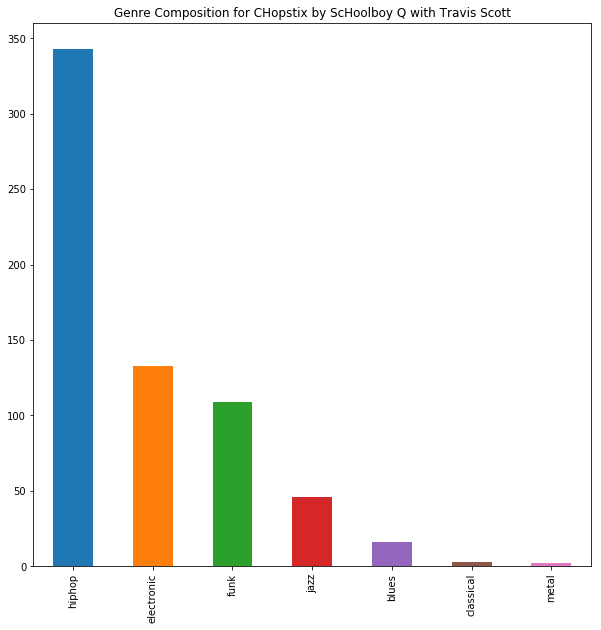

In [482]:
pop_song['predicted_genre'].value_counts().plot(kind='bar')

plt.title('Genre Composition for CHopstix by ScHoolboy Q with Travis Scott')

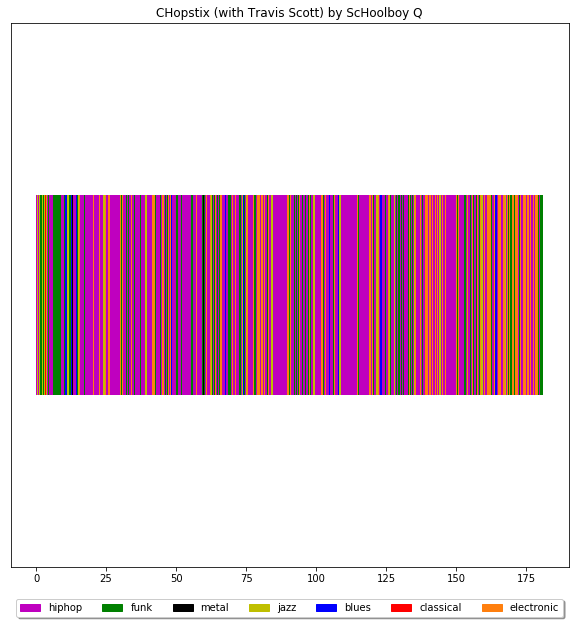

In [483]:
plt.rcParams["figure.figsize"] = (10,10)

colors = {'hiphop':'m',
           'funk': 'g',
           'metal': 'k',
           'jazz':'y',
           'blues':'b',
           'classical':'r',
           'electronic': 'C1'}

for segment in range(len(pop_song)):
    prediction = pop_song.iloc[segment]['predicted_genre']
    start = pop_song.iloc[segment]['start']
    duration = pop_song.iloc[segment]['durations']
    plt.hlines(xmin=start, xmax= start+duration, y=1,
               colors=colors[prediction], linewidth= 200)
plt.yticks([])
plt.xlabel='Seconds'
patches = [mpatches.Patch(color=color, label=genre) for genre, color in colors.items()]
plt.legend(handles=patches, bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=7,
           loc='upper center')
plt.title('{} by {}'.format(pop_song.iloc[segment]['song_name'],
                            pop_song.iloc[segment]['artist']))

plt.show()

This is neat, we can see the majority of the song is made up of hiphop, electronic and a bit of funk.
Check the song out for yourself [here](https://www.youtube.com/watch?v=5xvxgUE_pTA)

Chopstiiiiicks, chopsticks, chopsticks....

Lyrical genius.[](http://)


Pop music isn't necessarily a genre onto itself, it's whats popular right now. So it's kinda cool that we can see whats currently influencing current music.

We'll now test out our model with separate data from our original genres and see how it copes.

We have another dataset waiting in the wing- `testsongdata`...

Let's use our original `get_genre_df` function to save some time wrangling.

In [484]:
test_songs = get_genre_df('../input/testsongdata/')

In [485]:
test_songs.head()

,loudness,brightness,flatness,timbre_value_3,timbre_value_4,timbre_value_5,timbre_value_6,timbre_value_7,timbre_value_8,timbre_value_9,timbre_value_10,timbre_value_11,start,durations,song_name,artist,genre
0,0.000,171.130,9.469,-28.480,57.491,-50.067,14.833,5.359,-27.228,0.973,-10.640,-7.228,0.00000,0.37011,Come Fly With Me - Remastered,Frank Sinatra,jazz
1,22.962,-2.797,72.822,-106.059,38.694,57.985,-13.567,10.407,-39.365,34.564,12.057,-7.061,0.37011,0.33810,Come Fly With Me - Remastered,Frank Sinatra,jazz
2,33.242,53.483,114.695,-55.874,52.880,58.073,-16.490,6.225,-11.298,-37.768,-28.915,29.879,0.70821,0.46431,Come Fly With Me - Remastered,Frank Sinatra,jazz
3,41.558,138.898,140.658,6.667,46.371,37.987,-9.261,1.193,-10.918,-44.696,22.230,7.792,1.17252,0.17986,Come Fly With Me - Remastered,Frank Sinatra,jazz
4,40.931,111.347,79.991,89.914,45.716,10.830,-39.490,-39.021,-23.061,-18.028,-17.940,20.450,1.35238,0.45283,Come Fly With Me - Remastered,Frank Sinatra,jazz


In [486]:
# Predict the genre
test_songs_timbre = test_songs[training_colummns]
test_songs['predicted_genre'] = rf.predict(test_songs_timbre)

We'll create a function that either picks a random or chosen song  to process from our test_songs dataframe.

In [487]:
def get_song_data(song_dataframe, genre=None, song_name=None):
    if song_name:
        song_df = song_dataframe[song_dataframe['song_name']==song_name]
        return song_df
    else:
        genre_df = song_dataframe[song_dataframe['genre']==genre]
        random_song = np.random.choice(genre_df['song_name'].unique())
        random_song_data = genre_df[genre_df['song_name']==random_song]
        return random_song_data
        

In [488]:
def get_song_composition_bar(song_data):
    song_data['predicted_genre'].value_counts().plot(kind='bar')
    plt.title('{} by {}'.format(song_data.iloc[0]['song_name'],
                                song_data.iloc[0]['artist']))
    plt.show()

In [489]:
def get_song_composition_timeline(song_data):
    plt.rcParams["figure.figsize"] = (10,10)
    colors = {'hiphop':'m',
               'funk': 'g',
               'metal': 'k',
               'jazz':'y',
               'blues':'b',
               'classical':'r',
               'electronic': 'C1'}

    for segment in range(len(song_data)):
        prediction = song_data.iloc[segment]['predicted_genre']
        start = song_data.iloc[segment]['start']
        duration = song_data.iloc[segment]['durations']
        plt.hlines(xmin=start, xmax= start+duration, y=1,
                   colors=colors[prediction], linewidth= 200)
    plt.yticks([])
    plt.xlabel='Seconds'
    patches = [mpatches.Patch(color=color, label=genre) for genre, color in colors.items()]
    plt.legend(handles=patches, bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=7,
               loc='upper center')
    plt.title('{} by {}'.format(song_data.iloc[segment]['song_name'],
                                song_data.iloc[segment]['artist']))

    plt.show()

In [490]:
def song_composition(song_dataframe, genre=None, song_name=None):
    song_data = get_song_data(song_dataframe, genre, song_name=song_name)
    get_song_composition_bar(song_data)
    get_song_composition_timeline(song_data)
    

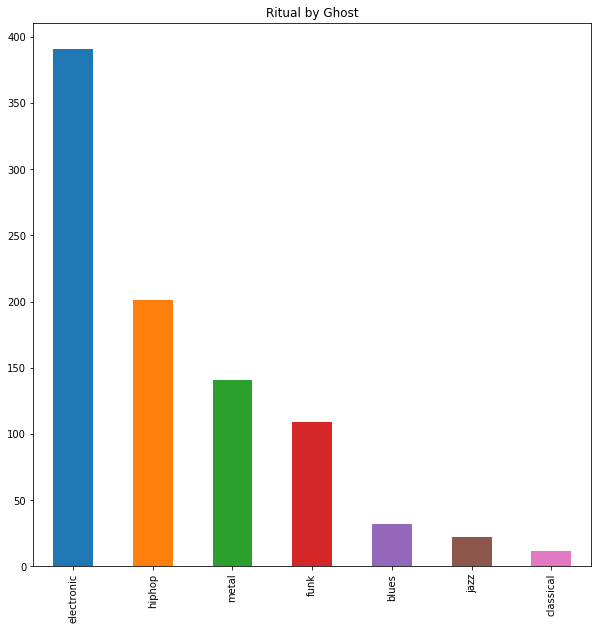

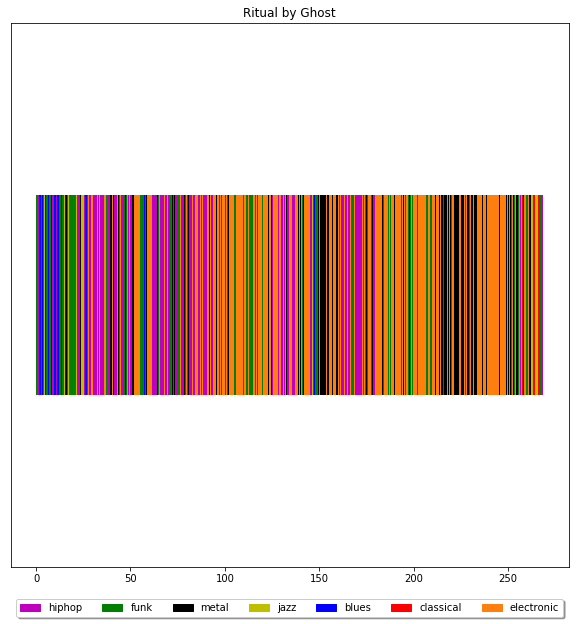

In [491]:
song_composition(test_songs, 'metal')

Try and explore and pick a song from the test dataframe

In [492]:
test_songs[test_songs['genre']=='metal']['song_name'].unique()

array(['Blood and Thunder', 'My Own Summer (Shove It)', 'Bleed',
       "L'Enfant Sauvage", 'Would?', 'Raining Blood',
       'Children of the Grave - 2009 Remastered Version', 'Laid to Rest',
       'Stranded', 'My Curse', 'Davidian', 'Panic Attack', 'Cirice',
       'Silvera', 'Ace of Spades', 'Duality', "I'm Broken",
       'Born in Dissonance', 'Ritual', 'Peace Sells - Remastered',
       'South Of Heaven', 'Cowboys From Hell', 'Crushed', 'Redneck',
       'Holy Wars...The Punishment Due - Remastered 2004',
       'Seasons In The Abyss', 'Wait and Bleed', 'Overkill', 'Walk',
       'Aerials', 'Angel Of Death', 'Jumpdafuckup', 'Madhouse',
       'Vice Grip', 'Happy Song', 'Spit It Out', 'The Sound Of Truth',
       'Caught In A Mosh', 'Paranoid - 2009 Remastered Version', 'Blind',
       'March of the S.O.D.', 'Clouds Over California', 'Dig',
       'Chop Suey!', 'Painkiller', 'Imperium',
       'Twilight Of The Thunder God', 'Halo', 'Roots Bloody Roots',
       'The End of Heartach

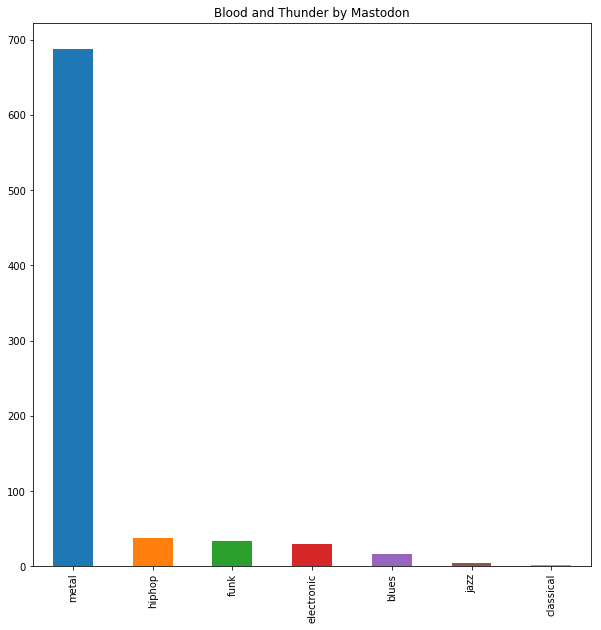

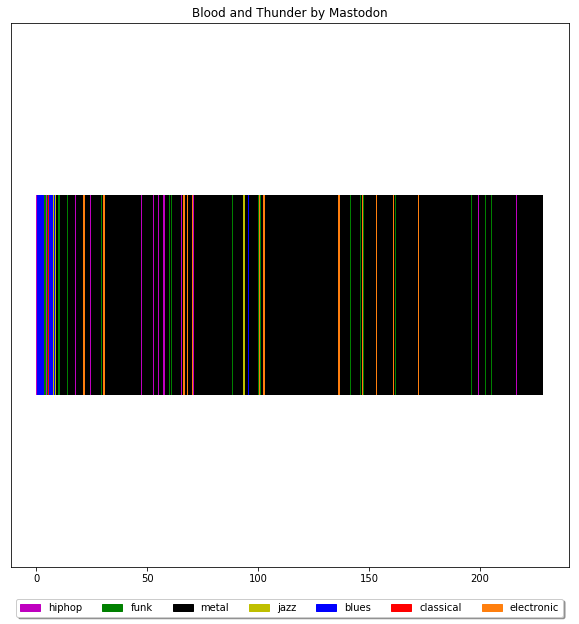

In [493]:
song_composition(test_songs, genre=None, song_name='Blood and Thunder')

We'll go through each genre and pick a random song...

metal


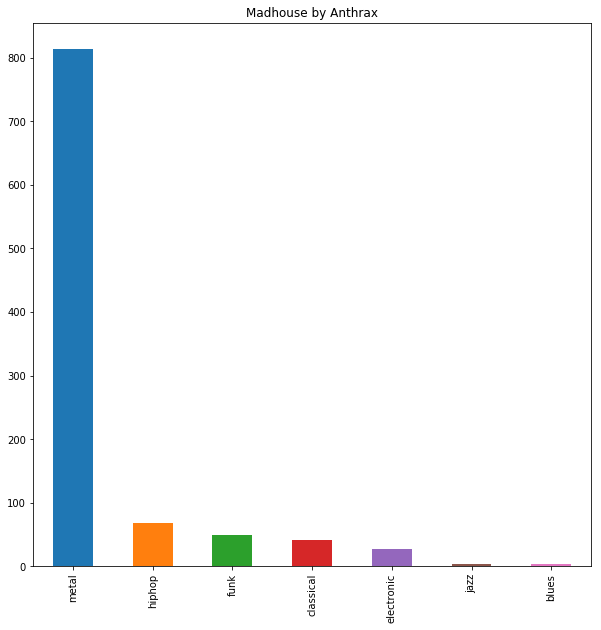

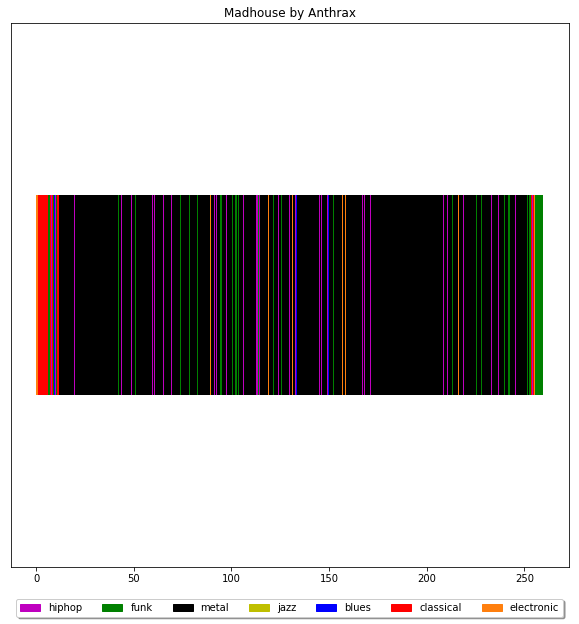

hiphop


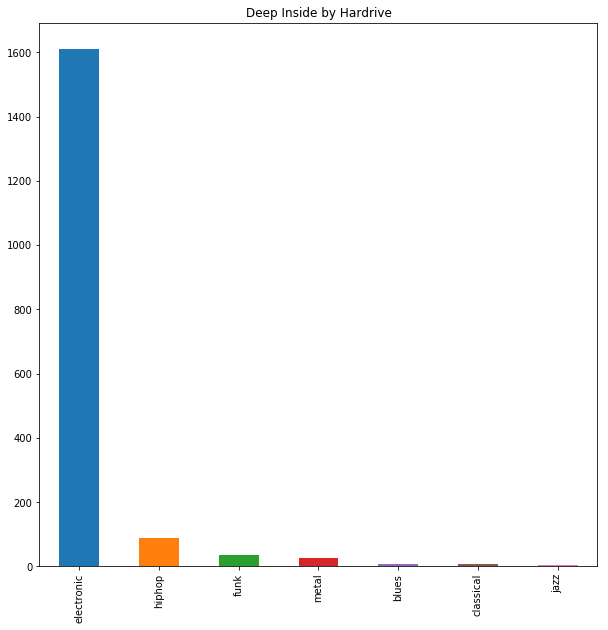

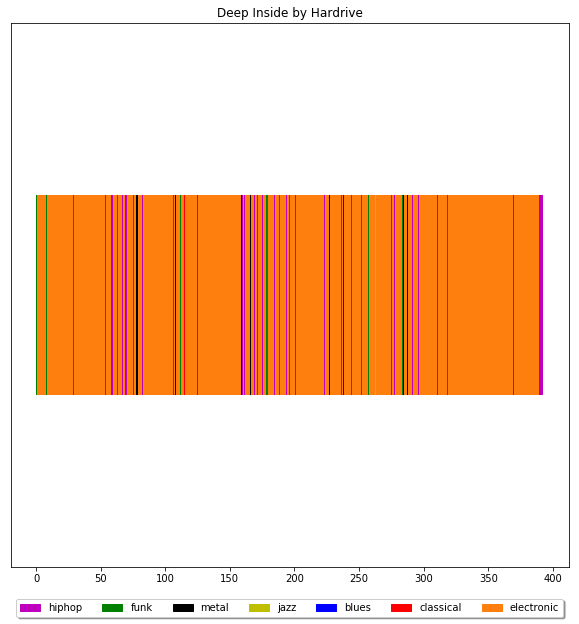

funk


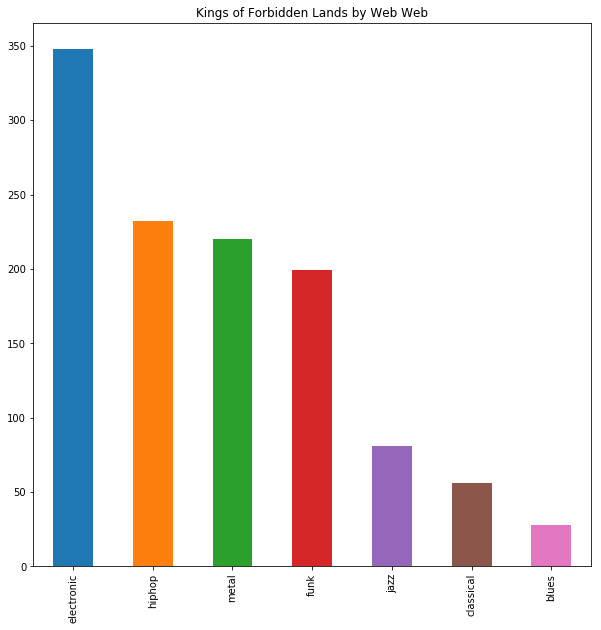

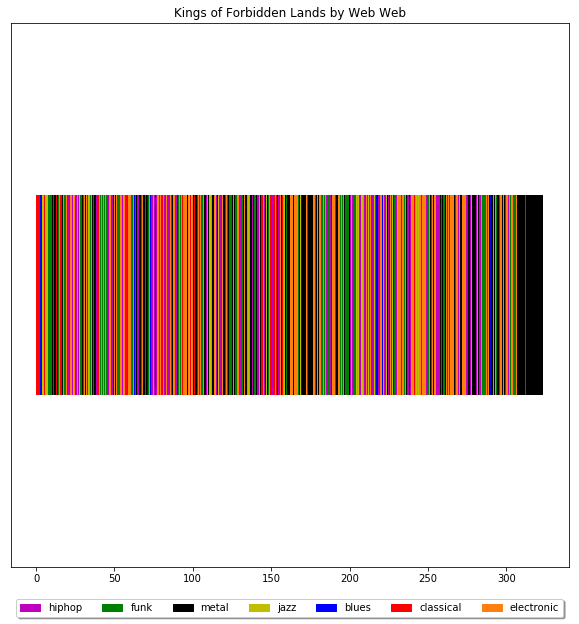

jazz


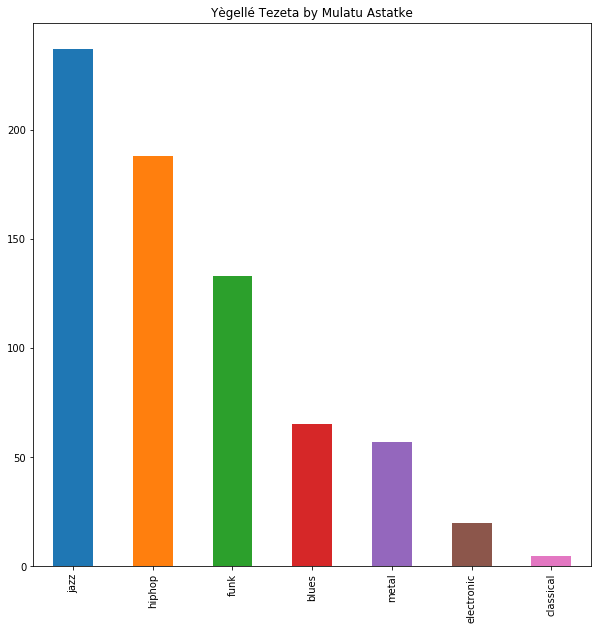

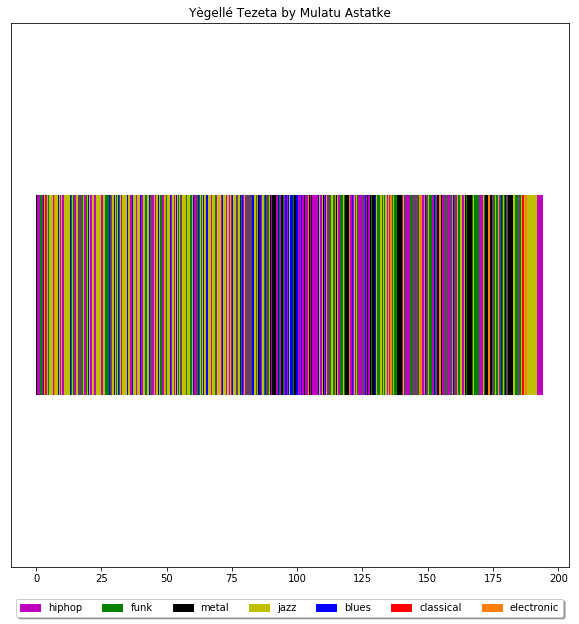

blues


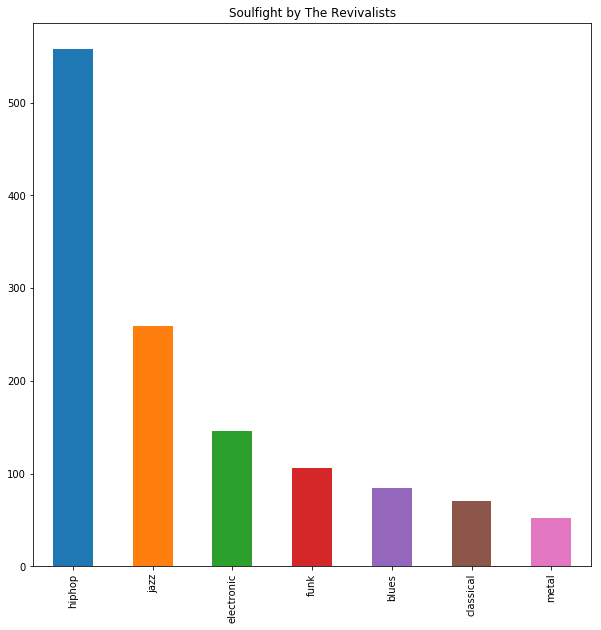

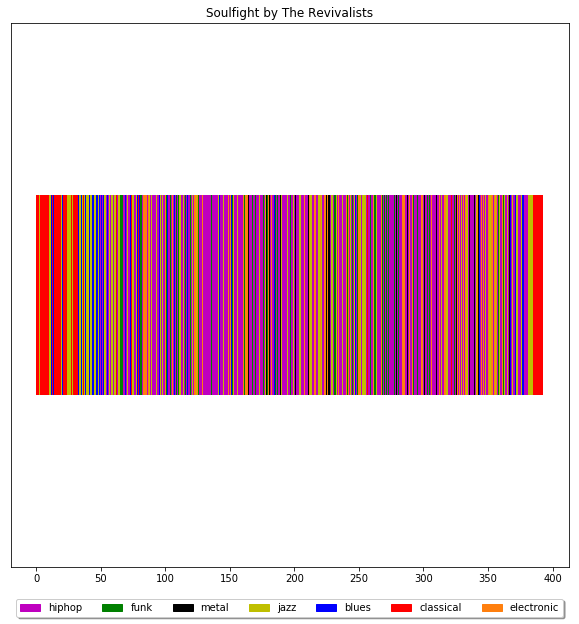

classical


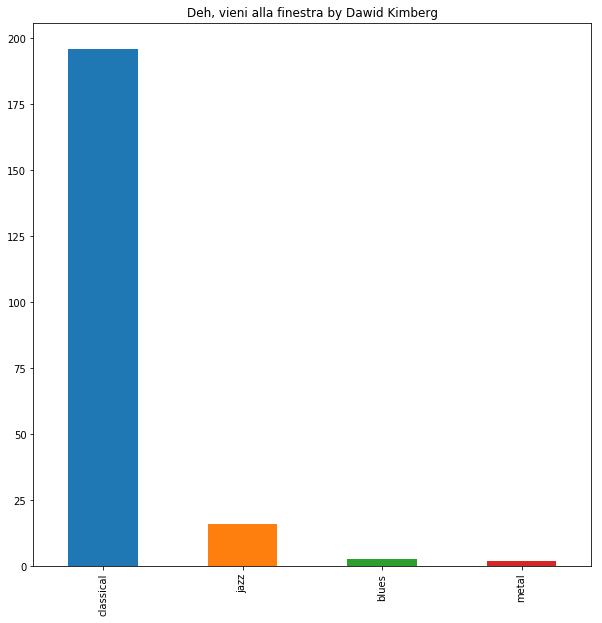

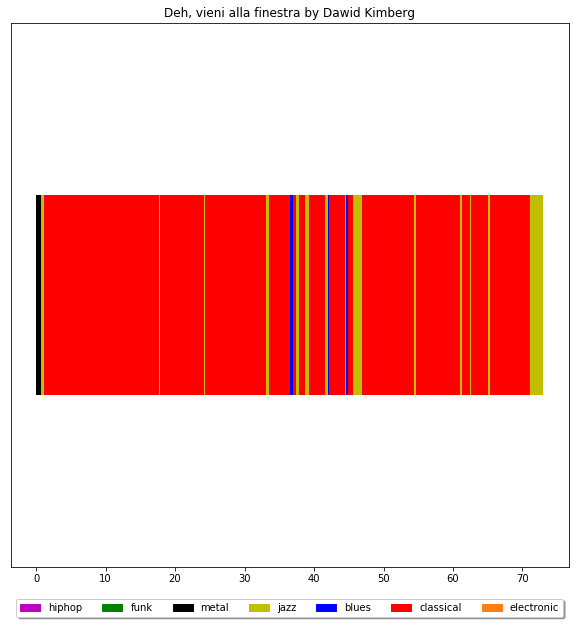

electronic


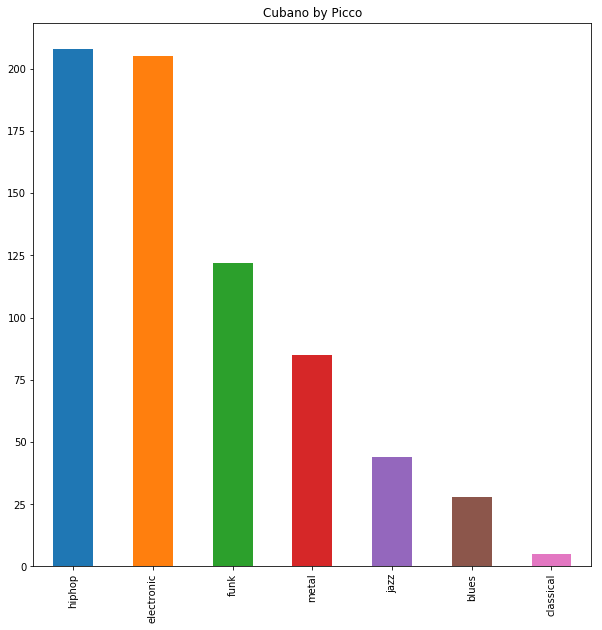

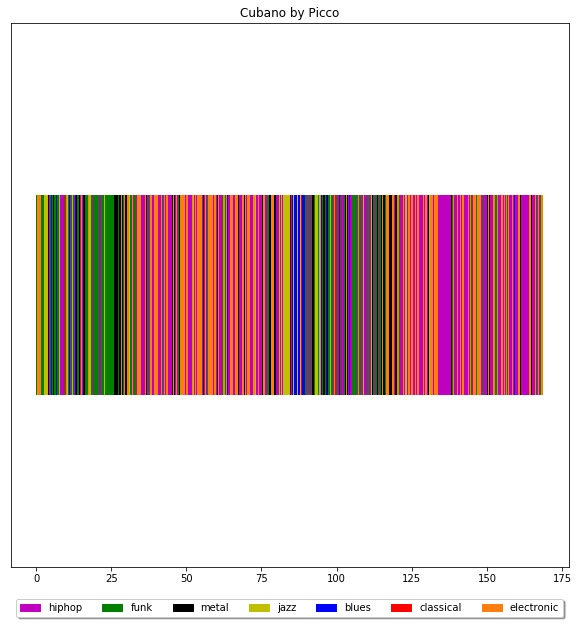

In [494]:
genre_types = ['metal','hiphop', 'funk', 'jazz', 'blues', 'classical', 'electronic']
for g in genre_types:
    print(g)
    song_composition(test_songs, g)

Phew...

OK that's the main part of the exercise complete, congratz! 🎉

These visualisation look pretty cool, you can even see the main parts like- intro, verses, chorus and even bridges!

If you have time to spare, or want to dive a bit deeper be our guest. 🍵🕯

Also, we mentioned about the `'90% of a data scientist time is spent sourcing and then cleaning the data'`

In this notebook we wrote `30` lines of code dedicated to ML, the rest (`284` lines) was getting and displaying the data.

That's approx `89.5%`, pretty close to the `90%` quote.

Here's a few suggestions:

* Try and cluster the data 
* Bring in the start time as a feature used to predict 
* Play around with the original data and see if you can extract other meaningful information for your model
* What could we use to distinguish hiphop from funk better? Maybe time signatures, or tempo, if we had a bigger dataset we could try and bring in artist name?
* Predict the verse, chorus, bidge, outros of a song or genre
* Try other predictive models
* Tune the hyperparams to optimise the current random forrest
> * Explore other APIs


# Just as promised here's a quick tutorial on calling an API
A lot of companies open up their APIs to the public so it's always worth checking their dev pages.

A great example of this is [TFL](https://api.tfl.gov.uk/)- The level of detail in this API is outrageous.

If your just looking to flex your API muscles then have a look at this website [apilist](https://apilist.fun/)

There's an API that gives us images of dogs, so of course we're going to use that...

https://dog.ceo/dog-api/

The dataset is based on the Stanford Dogs Dataset so hopefully we get some dog images back.

**NOTE** Kaggle notebooks do not support calling an API directly- So if you want to try this code out, just copy it into a local jupyter notebook/script.



```
# use requests to interact with an API
import requests

# The API path should be stated in the documentation 
api_path = 'https://dog.ceo/api/breeds/image/random'

# use the get to collect data from the access point.
r = requests.get(api_path).json()
# Copy the url from the message and enjoy the view
print(r['message'])

```


See you all next time! 👋👋👋👋